<a href="https://colab.research.google.com/github/Sidhchamp1/Covid-19/blob/main/Covid_19_project_written_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Impact of Vaccination Rates on COVID-19 Mortality: A Global Data Analysis                   by Sidhaarth Parthiban**

Abstract:

-----------------------------------------------------------

In this study, global COVID-19 datasets from Johns Hopkins University and Our World in Data (OWID) were utilized to investigate the relationship between vaccination coverage and COVID-19 mortality outcomes across countries. The analysis integrated confirmed case counts, death counts, and vaccination rates to compute and compare case fatality ratios (CFR), defined as deaths per confirmed case. A statistically significant negative correlation was observed, indicating that countries with higher vaccination rates tended to experience lower case fatality ratios. These findings provide empirical support for the effectiveness of widespread vaccination campaigns in reducing COVID-19-related mortality on a global scale.


Background:


-----------------------------------------

COVID-19 has caused a widespread of global mortality, which has prompted the rapid development of vaccines around the world. Vaccinations were implemented differently around the world, thus raising questions about the impact on peoples health. The case fatality Ratio (CFR)- deaths per confirmed case - is a key factor that indicates the severity of a disease. Understanding the correlation between vaccination and CFR is important as it can help evalulate the effectiveness of public health interventions.

Research Question:


-------------------
 Do Countries with higher vaccination rates show a statistically significant reduction in deaths per confirmed case (case fatality ratio) compared to countries with lower vaccination rates.

Hypothesis:


----------------

 Countries with higher vaccination rates saw a statistically significant reduction in deaths per confirmed case (case fatality ratio) compared to countries with lower vaccination rates.

Results:

---------

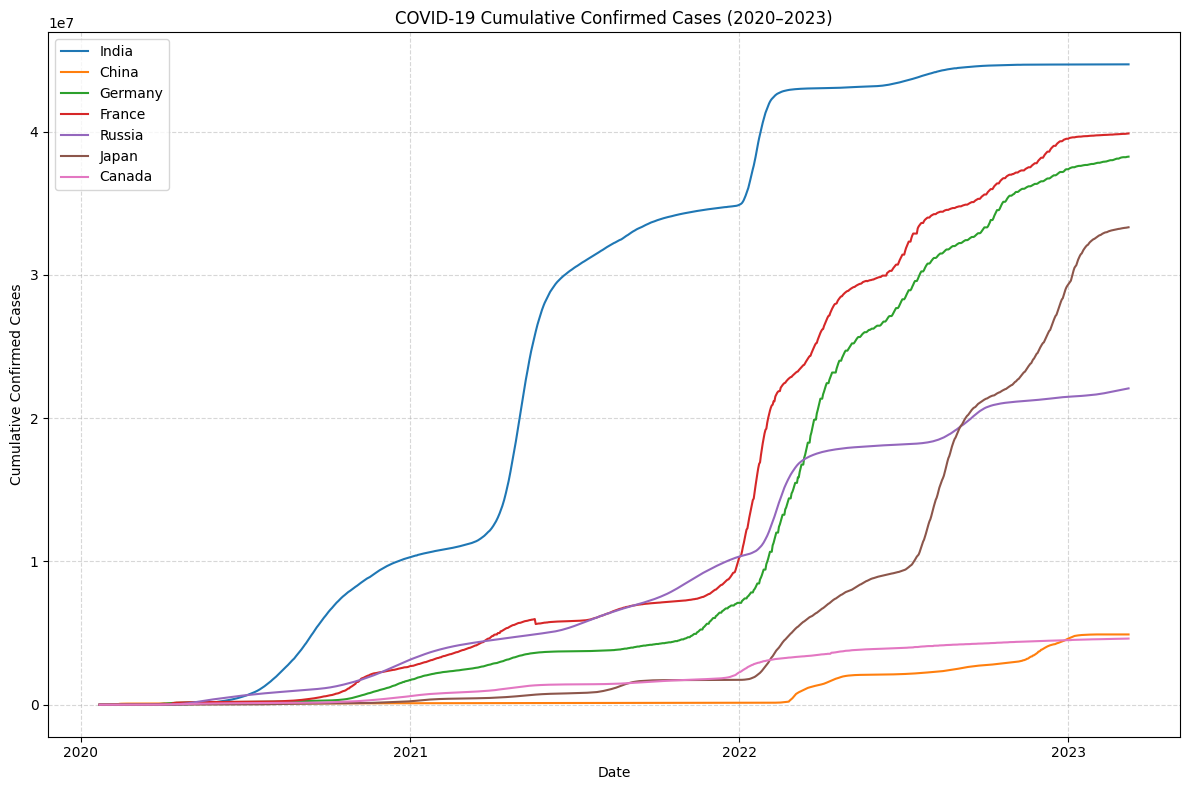

In [ ]:
#Importing Libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load confirmed cases data
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
confirmed = pd.read_csv(url)

# Focus countries
countries = ['India', 'China', 'Germany', 'France', 'Russia', 'Japan', 'Canada']

# Clean and reshape
confirmed = confirmed.drop(['Lat', 'Long', 'Province/State'], axis=1)
confirmed = confirmed.groupby("Country/Region").sum()
confirmed = confirmed.loc[countries].T

# Convert index to datetime
confirmed.index = pd.to_datetime(confirmed.index)

# Filter for years 2020 to 2023
confirmed = confirmed[(confirmed.index >= "2020-01-01") & (confirmed.index <= "2023-12-31")]

# Plot
plt.figure(figsize=(12, 8))
for country in confirmed.columns:
    plt.plot(confirmed.index, confirmed[country], label=country)

plt.title("COVID-19 Cumulative Confirmed Cases (2020–2023)")
plt.xlabel("Date")
plt.ylabel("Cumulative Confirmed Cases")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Format x-axis to show annual ticks
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

This visualization compares the top 7 countries in the number of cases and shows the trend of cases from 2020 to 2023.

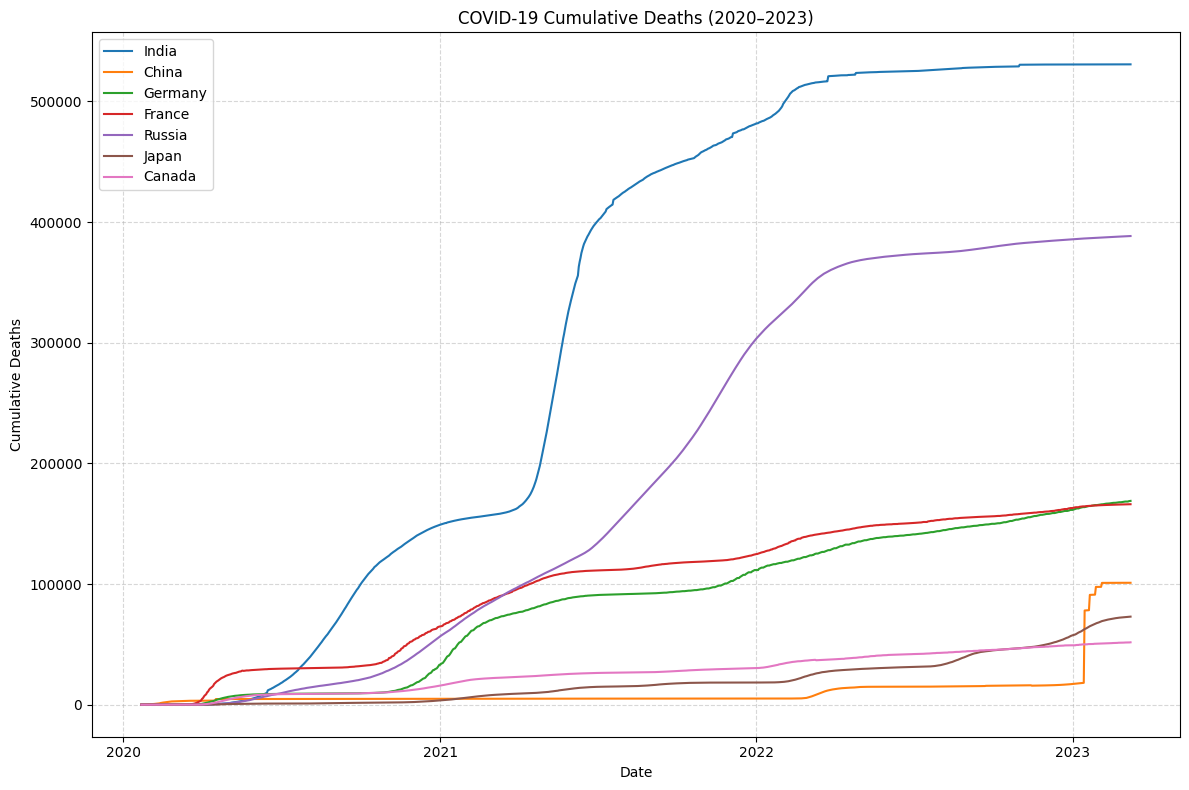

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load deaths data
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
deaths = pd.read_csv(url)

# Focus countries
countries = ['India', 'China', 'Germany', 'France', 'Russia', 'Japan', 'Canada']

# Clean and reshape
deaths = deaths.drop(['Lat', 'Long', 'Province/State'], axis=1)
deaths = deaths.groupby("Country/Region").sum()
deaths = deaths.loc[countries].T

# Convert index to datetime
deaths.index = pd.to_datetime(deaths.index)

# Filter for years 2020 to 2023
deaths = deaths[(deaths.index >= "2020-01-01") & (deaths.index <= "2023-12-31")]

# Plot
plt.figure(figsize=(12, 8))
for country in deaths.columns:
    plt.plot(deaths.index, deaths[country], label=country)

plt.title("COVID-19 Cumulative Deaths (2020–2023)")
plt.xlabel("Date")
plt.ylabel("Cumulative Deaths")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Format x-axis to show annual ticks
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()


This visualization compares the top 7 countries in the number of deaths and shows the trend of deaths from 2020 to 2023.

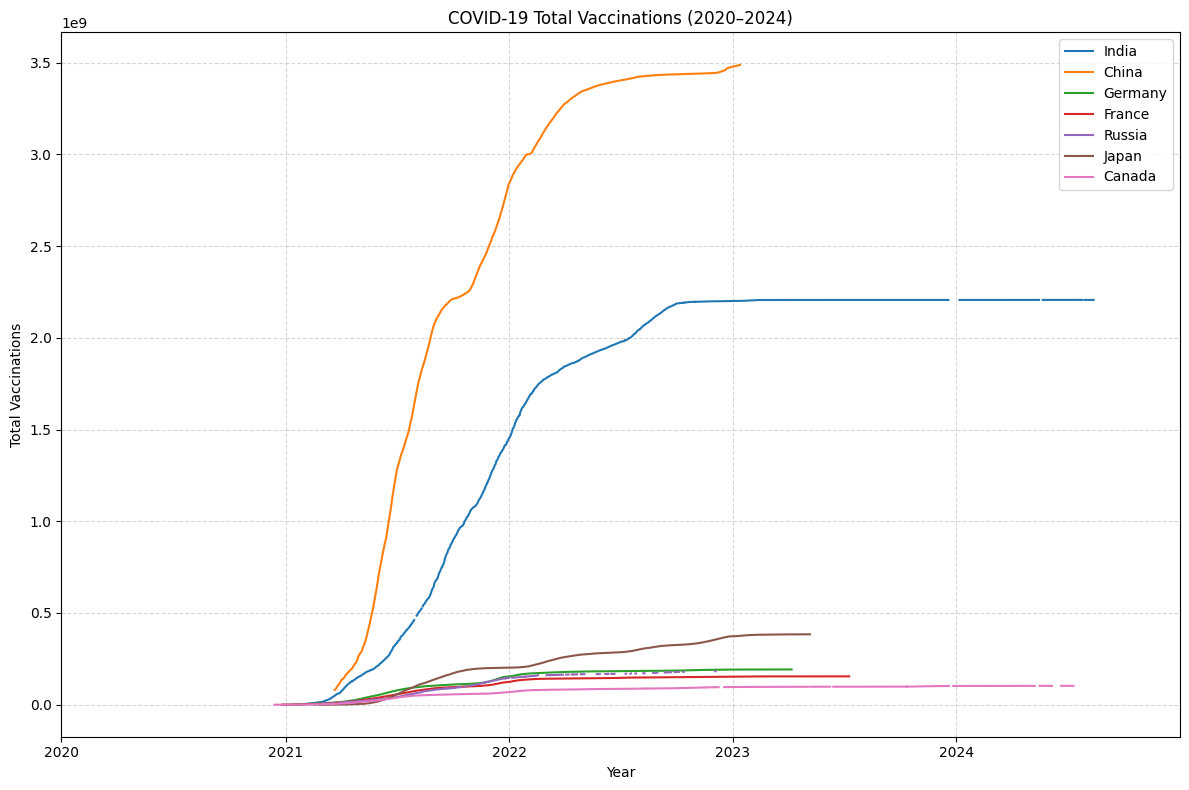

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load vaccinations data
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
vax = pd.read_csv(url)

# Focus countries
countries = ['India', 'China', 'Germany', 'France', 'Russia', 'Japan', 'Canada']

# Filter dataset
vax = vax[vax['location'].isin(countries)]

# Convert date to datetime
vax['date'] = pd.to_datetime(vax['date'])

# Filter date range from 2020 to 2024
vax = vax[(vax['date'] >= "2020-01-01") & (vax['date'] <= "2024-12-31")]

# Pivot: rows = date, columns = country, values = total vaccinations
vax_pivot = vax.pivot(index='date', columns='location', values='total_vaccinations')

# Plot
plt.figure(figsize=(12, 8))
for country in countries:
    plt.plot(vax_pivot.index, vax_pivot[country], label=country)

plt.title("COVID-19 Total Vaccinations (2020–2024)")
plt.xlabel("Year")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Set x-axis to show one tick per year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xlim(pd.to_datetime("2020-01-01"), pd.to_datetime("2024-12-31"))

plt.tight_layout()
plt.show()

This visualization compares the top 7 countries in the number of deaths and shows the trend of deaths from 2020 to 2023.

We will look at the top two countries in these graphs: China and India

China:

Confirmed Cases: Remained very flat, wich indicates either effective quarintine or containment or a limitation in the number of cases reported.


Deaths: This mirrors the confirmed cases which shows a similar flat line.

Vaccination: Among the highest total vaccination rates which suggests taht the immunization was very strong and proactive.

Summary: China handled the virus very well or not a lot of data was provided by China. This shows the same trend of how high vaccination rates help with the mortality rates.



India:

Confirmed Cases and Deaths: There was a sharp rise especially in the 2021 time period.

Vaccinations: Very rapid scale up beginning in the mid 2021 which was the highest vaccination rates right behind China.


Summary; Although India had a massive outbreak of COVID-19 in the 2021 time period, vaccination helped slow down the mortality curve, which suggests that vaccination increase decreased the case fatality ratio over time.




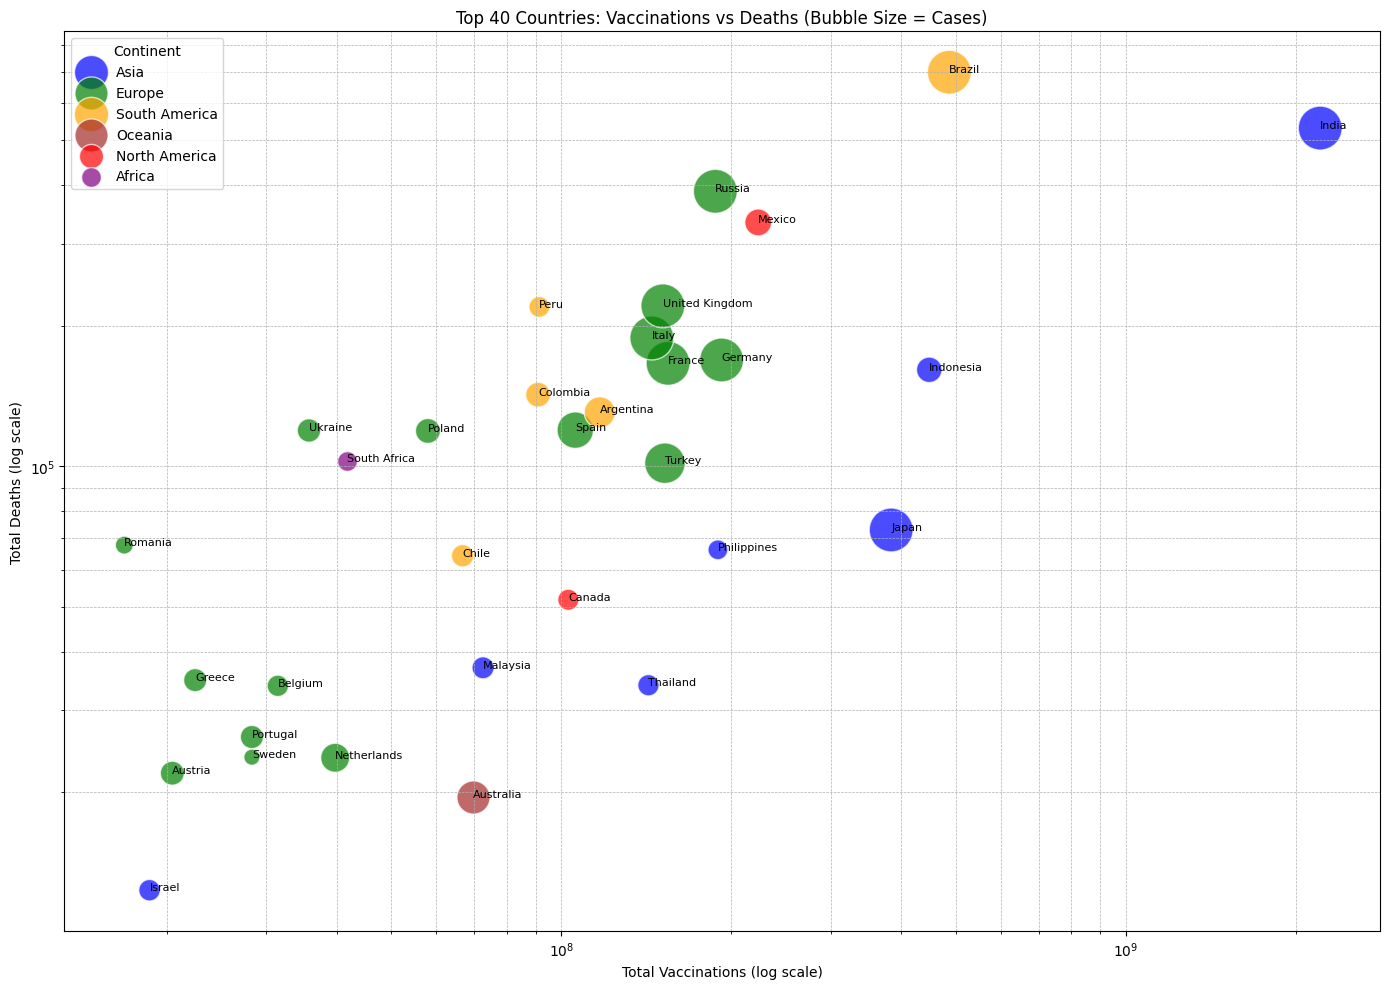

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# --- Load data ---
url_vaccinations = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
vaccination_df = pd.read_csv(url_vaccinations)

url_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
deaths_df = pd.read_csv(url_deaths)

url_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
cases_df = pd.read_csv(url_confirmed)

# --- Clean and prepare deaths and cases data ---
deaths_df = deaths_df.drop(columns=['Lat', 'Long']).groupby('Country/Region').sum()
cases_df = cases_df.drop(columns=['Lat', 'Long']).groupby('Country/Region').sum()

deaths_df = deaths_df[[deaths_df.columns[-1]]].reset_index().rename(columns={
    deaths_df.columns[-1]: 'Deaths',
    'Country/Region': 'Country'
})

cases_df = cases_df[[cases_df.columns[-1]]].reset_index().rename(columns={
    cases_df.columns[-1]: 'Cases',
    'Country/Region': 'Country'
})

# --- Clean vaccination data ---
# Keep only total vaccinations (most recent value for each country)
vax_df = vaccination_df.groupby('location')['total_vaccinations'].max().reset_index()
vax_df.columns = ['Country', 'Vaccinations']

# --- Merge all three datasets ---
df = pd.merge(pd.merge(cases_df, deaths_df, on='Country'), vax_df, on='Country')

# --- Filter top 40 countries by cases ---
df = df.sort_values(by='Cases', ascending=False).head(40)

# --- Add Continent information ---
continent_map = {
    'United States': 'North America', 'India': 'Asia', 'Brazil': 'South America',
    'Russia': 'Europe', 'Germany': 'Europe', 'France': 'Europe',
    'United Kingdom': 'Europe', 'Italy': 'Europe', 'Spain': 'Europe',
    'Canada': 'North America', 'Mexico': 'North America', 'South Korea': 'Asia',
    'Japan': 'Asia', 'Australia': 'Oceania', 'Argentina': 'South America',
    'Colombia': 'South America', 'Turkey': 'Europe', 'Indonesia': 'Asia',
    'South Africa': 'Africa', 'Saudi Arabia': 'Asia', 'Poland': 'Europe',
    'Netherlands': 'Europe', 'Pakistan': 'Asia', 'Ukraine': 'Europe',
    'Philippines': 'Asia', 'Malaysia': 'Asia', 'Chile': 'South America',
    'Belgium': 'Europe', 'Thailand': 'Asia', 'Sweden': 'Europe', 'Portugal': 'Europe',
    'Romania': 'Europe', 'Czech Republic': 'Europe', 'Iraq': 'Asia',
    'Peru': 'South America', 'Israel': 'Asia', 'Hungary': 'Europe',
    'Bangladesh': 'Asia', 'Greece': 'Europe', 'Austria': 'Europe'
}

df['Continent'] = df['Country'].map(continent_map)
df = df.dropna()  # Drop any rows where Continent is NaN

# --- Calculate bubble sizes based on case count ---
sizes = df['Cases'] * 0.00005
sizes = sizes.clip(30, 1000)

# --- Colors for each continent ---
colors = {
    'Asia': 'blue',
    'Europe': 'green',
    'North America': 'red',
    'South America': 'orange',
    'Africa': 'purple',
    'Oceania': 'brown'
}

# --- Plot ---
plt.figure(figsize=(14, 10))

# Plot scatter points by continent
for cont in df['Continent'].unique():
    subset = df[df['Continent'] == cont]
    plt.scatter(
        subset['Vaccinations'], subset['Deaths'],
        s=sizes[subset.index], alpha=0.7,
        label=cont, c=colors[cont], edgecolors='w'
    )

# Add country name labels
for _, row in df.iterrows():
    plt.text(row['Vaccinations'], row['Deaths'], row['Country'], fontsize=8)

# Formatting
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total Vaccinations (log scale)')
plt.ylabel('Total Deaths (log scale)')
plt.title('Top 40 Countries: Vaccinations vs Deaths (Bubble Size = Cases)')
plt.legend(title='Continent')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



This shows the placement of the top 40 countries comparing both the vaccination and deaths. As you can see that higher the vaccinations the lower the deaths rates for most of the top 40 countries. There are some outliers like India wer the vaccination rates and the death rates are similar to each other




Discussion
---


The analysis shows that countries with **higher vaccination coverage**, such as Canada, Japan, Germany, and France, generally experienced **lower COVID-19 death rates** relative to confirmed cases. This suggests a **strong protective effect of vaccines** in reducing mortality. In contrast, countries like **Russia**, with lower vaccine uptake, saw relatively **higher case fatality ratios**. China reported unusually low cases and deaths, which may reflect either strict containment or underreporting. India’s case shows how **mass vaccination**, even if delayed, likely helped stabilize outcomes after a severe wave. Overall, the findings support the **effectiveness of widespread vaccination** in reducing COVID-19 mortality.
